In [117]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import lib.clean
import lib.data_preprocessing as DP

# Extract the Data
df = pd.read_csv('Telco_Customer_Churn.csv')

In [118]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [119]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [120]:
df = df.replace(" ", np.nan)

In [121]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
df.shape

(7043, 21)

In [31]:
df.dropna(how = 'any', inplace = True)

In [32]:
df.shape

(7032, 21)

In [33]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
# Data Cleaning
#print(df.isna().sum())

# Capitalize the column names
df = lib.clean.clean_dataframe(df)

df = lib.clean.group_tenure(df)

# Data Preprocessing
keep_columns = []
for col in df.columns:
    if col not in ['CreatedTenure', 'Customerid']:
        keep_columns.append(col)

df = df[keep_columns]

In [35]:
df.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
y = df[['Churn']]

In [37]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [38]:
df.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
df.drop(['Churn'], axis = 1, inplace = True)

In [40]:
df.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [41]:
dp = DP.PreProcessing(df)

C:\Users\owner\class\classCLASS\classMaterials\projectDemo\DEMO\lib\data_preprocessing.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.df = df.copy()


In [42]:
multCol, binCol = dp.get_categorical()

C:\Users\owner\class\classCLASS\classMaterials\projectDemo\DEMO\lib\data_preprocessing.py:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.cat_cols = self.df.nunique()[self.df.nunique() < 6].keys().tolist() # getting
C:\Users\owner\class\classCLASS\classMaterials\projectDemo\DEMO\lib\data_preprocessing.py:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.num_cols = [x for x in self.df.columns if x not in self.cat_cols]
C:\Users\owner\class\classCLASS\classMaterials\projectDemo\DEMO\lib\data_preprocessing.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.bin_cols = self.df.nunique()[self.df.nunique() == 2].keys().toli

In [43]:
multCol

['Multiplelines', 'Internetservice', 'Contract', 'Paymentmethod']

In [44]:
binCol

['Gender',
 'Seniorcitizen',
 'Partner',
 'Dependents',
 'Phoneservice',
 'Onlinesecurity',
 'Onlinebackup',
 'Deviceprotection',
 'Techsupport',
 'Streamingtv',
 'Streamingmovies',
 'Paperlessbilling']

In [45]:
df.isnull().sum()

Gender              0
Seniorcitizen       0
Partner             0
Dependents          0
Tenure              0
Phoneservice        0
Multiplelines       0
Internetservice     0
Onlinesecurity      0
Onlinebackup        0
Deviceprotection    0
Techsupport         0
Streamingtv         0
Streamingmovies     0
Contract            0
Paperlessbilling    0
Paymentmethod       0
Monthlycharges      0
Totalcharges        0
dtype: int64

In [46]:
for col in multCol:
    emb = DP.Embedding(df[col], 5, col)
    dfdf = emb.create()
    df = pd.concat([df, dfdf], axis = 1)
    df.drop(col, axis =1, inplace = True)    

In [47]:
df.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,...,Contract_0,Contract_1,Contract_2,Contract_3,Contract_4,Paymentmethod_0,Paymentmethod_1,Paymentmethod_2,Paymentmethod_3,Paymentmethod_4
0,Female,No,Yes,No,1,No,No,Yes,No,No,...,-1.199674,0.824454,0.259079,0.895528,0.132338,0.129831,0.933880,-0.982315,-0.947760,0.608648
1,Male,No,No,No,34,Yes,Yes,No,Yes,No,...,0.302423,-0.679414,-0.838916,0.740585,-1.082593,-1.468079,-0.541986,-0.216859,-0.220273,-0.621247
2,Male,No,No,No,2,Yes,Yes,Yes,No,No,...,-1.199674,0.824454,0.259079,0.895528,0.132338,-1.468079,-0.541986,-0.216859,-0.220273,-0.621247
3,Male,No,No,No,45,No,Yes,No,Yes,Yes,...,0.302423,-0.679414,-0.838916,0.740585,-1.082593,1.250971,-0.407415,-0.960136,-1.955823,-1.273413
4,Female,No,No,No,2,Yes,No,No,No,No,...,-1.199674,0.824454,0.259079,0.895528,0.132338,0.129831,0.933880,-0.982315,-0.947760,0.608648


In [48]:
pre = DP.PreProcessing(df)

C:\Users\owner\class\classCLASS\classMaterials\projectDemo\DEMO\lib\data_preprocessing.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.df = df.copy()


In [49]:
df = pre.Encode_OHE()

C:\Users\owner\class\classCLASS\classMaterials\projectDemo\DEMO\lib\data_preprocessing.py:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.cat_cols = self.df.nunique()[self.df.nunique() < 6].keys().tolist() # getting
C:\Users\owner\class\classCLASS\classMaterials\projectDemo\DEMO\lib\data_preprocessing.py:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.num_cols = [x for x in self.df.columns if x not in self.cat_cols]
C:\Users\owner\class\classCLASS\classMaterials\projectDemo\DEMO\lib\data_preprocessing.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.bin_cols = self.df.nunique()[self.df.nunique() == 2].keys().toli

In [50]:
df.to_csv('Model_DataFrame.csv')

In [51]:
X = pd.read_csv('Model_DataFrame.csv')

In [52]:
X.head()

,Unnamed: 0,Tenure,Monthlycharges,Totalcharges,Multiplelines_0,Multiplelines_1,Multiplelines_2,Multiplelines_3,Multiplelines_4,Internetservice_0,...,Deviceprotection_No,Deviceprotection_Yes,Techsupport_No,Techsupport_Yes,Streamingtv_No,Streamingtv_Yes,Streamingmovies_No,Streamingmovies_Yes,Paperlessbilling_No,Paperlessbilling_Yes
0,0,1,29.85,29.85,1,1,0,0,0,2,...,1,0,1,0,1,0,1,0,0,1
1,1,34,56.95,1889.50,2,2,2,2,1,2,...,0,1,1,0,1,0,1,0,1,0
2,2,2,53.85,108.15,2,2,2,2,1,2,...,1,0,1,0,1,0,1,0,0,1
3,3,45,42.30,1840.75,1,1,0,0,0,2,...,0,1,0,1,1,0,1,0,1,0
4,4,2,70.70,151.65,2,2,2,2,1,1,...,1,0,1,0,1,0,1,0,0,1


In [53]:
X.columns

Index(['Unnamed: 0', 'Tenure', 'Monthlycharges', 'Totalcharges',
       'Multiplelines_0', 'Multiplelines_1', 'Multiplelines_2',
       'Multiplelines_3', 'Multiplelines_4', 'Internetservice_0',
       'Internetservice_1', 'Internetservice_2', 'Internetservice_3',
       'Internetservice_4', 'Contract_0', 'Contract_1', 'Contract_2',
       'Contract_3', 'Contract_4', 'Paymentmethod_0', 'Paymentmethod_1',
       'Paymentmethod_2', 'Paymentmethod_3', 'Paymentmethod_4',
       'Gender_Female', 'Gender_Male', 'Seniorcitizen_No', 'Seniorcitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'Phoneservice_No', 'Phoneservice_Yes', 'Onlinesecurity_No',
       'Onlinesecurity_Yes', 'Onlinebackup_No', 'Onlinebackup_Yes',
       'Deviceprotection_No', 'Deviceprotection_Yes', 'Techsupport_No',
       'Techsupport_Yes', 'Streamingtv_No', 'Streamingtv_Yes',
       'Streamingmovies_No', 'Streamingmovies_Yes', 'Paperlessbilling_No',
       'Paperlessbilling_Yes'],


1. Scaling (standard scaler)
2. feature extraction (PCA)
3. pass through algorithms
4. Check the metrics (confusion matrix)
5. Prediction

In [54]:
X.drop('Unnamed: 0', axis = 1, inplace = True)

In [55]:
X.head()

,Tenure,Monthlycharges,Totalcharges,Multiplelines_0,Multiplelines_1,Multiplelines_2,Multiplelines_3,Multiplelines_4,Internetservice_0,Internetservice_1,...,Deviceprotection_No,Deviceprotection_Yes,Techsupport_No,Techsupport_Yes,Streamingtv_No,Streamingtv_Yes,Streamingmovies_No,Streamingmovies_Yes,Paperlessbilling_No,Paperlessbilling_Yes
0,1,29.85,29.85,1,1,0,0,0,2,2,...,1,0,1,0,1,0,1,0,0,1
1,34,56.95,1889.50,2,2,2,2,1,2,2,...,0,1,1,0,1,0,1,0,1,0
2,2,53.85,108.15,2,2,2,2,1,2,2,...,1,0,1,0,1,0,1,0,0,1
3,45,42.30,1840.75,1,1,0,0,0,2,2,...,0,1,0,1,1,0,1,0,1,0
4,2,70.70,151.65,2,2,2,2,1,1,0,...,1,0,1,0,1,0,1,0,0,1


In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
sc = StandardScaler()

In [98]:
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
X_std = sc.transform(X)

In [100]:
X_std

array([[-1.28024804, -1.16169394, -0.99419409, ..., -0.79684918,
        -0.82893915,  0.82893915],
       [ 0.06430269, -0.26087792, -0.17373982, ..., -0.79684918,
         1.20636117, -1.20636117],
       [-1.23950408, -0.36392329, -0.95964911, ..., -0.79684918,
        -0.82893915,  0.82893915],
       ...,
       [-0.87280842, -1.17000405, -0.85451414, ..., -0.79684918,
        -0.82893915,  0.82893915],
       [-1.15801615,  0.31916782, -0.87209546, ..., -0.79684918,
        -0.82893915,  0.82893915],
       [ 1.36810945,  1.35793167,  2.01234407, ...,  1.25494263,
        -0.82893915,  0.82893915]])

In [101]:
X_std1 = sc.fit_transform(X)

In [102]:
X_std1

array([[-1.28024804, -1.16169394, -0.99419409, ..., -0.79684918,
        -0.82893915,  0.82893915],
       [ 0.06430269, -0.26087792, -0.17373982, ..., -0.79684918,
         1.20636117, -1.20636117],
       [-1.23950408, -0.36392329, -0.95964911, ..., -0.79684918,
        -0.82893915,  0.82893915],
       ...,
       [-0.87280842, -1.17000405, -0.85451414, ..., -0.79684918,
        -0.82893915,  0.82893915],
       [-1.15801615,  0.31916782, -0.87209546, ..., -0.79684918,
        -0.82893915,  0.82893915],
       [ 1.36810945,  1.35793167,  2.01234407, ...,  1.25494263,
        -0.82893915,  0.82893915]])

In [56]:
# Check later
convert = lambda x: 1 if x is 'Yes' else 0

In [57]:
dic = {'Yes': 1, 'No': 0}

In [58]:
convert = lambda x: dic[x]

In [59]:
y['Churn'] = y['Churn'].apply(convert)

In [60]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [61]:
from sklearn.decomposition import PCA

In [65]:
pca  = PCA(n_components = 4)

In [103]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
pca.explained_variance_ratio_

array([9.99857693e-01, 1.22587695e-04, 1.67171041e-05, 6.41943570e-07,
       4.91221430e-07, 3.75107865e-07, 3.48846140e-07, 2.66550694e-07,
       1.21825752e-07, 1.06188978e-07, 9.72774914e-08, 8.72893751e-08,
       7.87595182e-08, 6.00231721e-08, 5.75080577e-08, 5.39290472e-08,
       4.98652283e-08, 4.88705519e-08, 4.28355011e-08, 3.78130420e-08,
       3.62216443e-08, 5.15253918e-10, 6.80797187e-33, 6.80797187e-33,
       6.80797187e-33, 6.80797187e-33, 6.80797187e-33, 6.80797187e-33,
       6.80797187e-33, 6.80797187e-33, 6.80797187e-33, 6.80797187e-33,
       6.80797187e-33, 6.80797187e-33, 6.80797187e-33, 6.80797187e-33,
       6.80797187e-33, 6.80797187e-33, 6.80797187e-33, 6.80797187e-33,
       6.80797187e-33, 6.80797187e-33, 6.80797187e-33, 6.80797187e-33,
       6.80797187e-33, 6.80797187e-33, 6.80797187e-33])

In [104]:
pca.explained_variance_ratio_

array([0.20893234, 0.14581465, 0.08821911, 0.06360595])

In [105]:
pca  = PCA(n_components = 4)
X_pca = pca.fit_transform(X)

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

from yellowbrick.model_selection import CVScores

from sklearn.model_selection import train_test_split

C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = .3, random_state = 1000, stratify = y)

In [107]:
cv = StratifiedKFold(n_splits = 10, random_state = 42)

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [115]:
model_log = LogisticRegression(penalty='l1', C = 100)
visualizer = CVScores(model_log, cv = cv, scoring = 'f1_weighted')

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


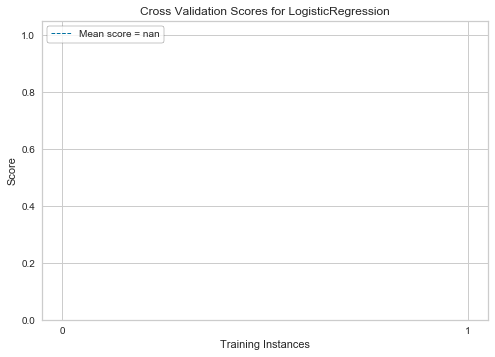

In [113]:
visualizer.fit(X_train, y_train)
visualizer.show()

C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

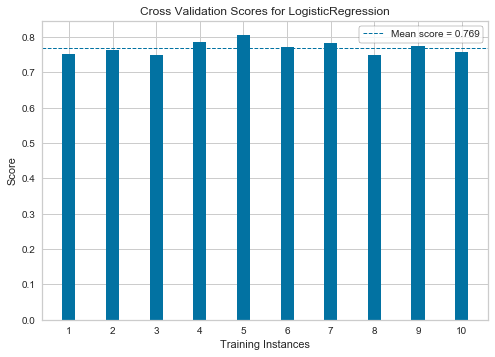

In [109]:
visualizer.fit(X_train, y_train)
visualizer.show()

C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

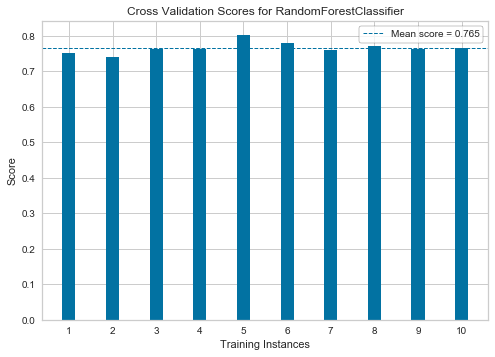

In [110]:
from sklearn.ensemble import RandomForestClassifier as RFC
model_random = RFC()
visualizer = CVScores(model_random, cv = cv, scoring = 'f1_weighted')
visualizer.fit(X_train, y_train)
visualizer.show()

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
def confusion(model):
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
    print('Classification Report: ', classification_report(y_test, y_pred))
    
    return clf

In [82]:
confusion(model_log)

Confusion Matrix: [[1401  148]
 [ 304  257]]
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.63      0.46      0.53       561

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.77      2110



C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
confusion(model_log)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [84]:
y['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [85]:
confusion(model_random)

C:\Users\owner\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix: [[1357  192]
 [ 272  289]]
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.70      2110
weighted avg       0.77      0.78      0.77      2110



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
from sklearn.ensemble import AdaBoostClassifier as ABC

In [94]:
model_ADA = ABC(n_estimators = 100, learning_rate= 0.01)

In [89]:
confusion(model_ADA)

C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: [[1381  168]
 [ 276  285]]
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.51      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [95]:
confusion(model_ADA)

C:\Users\owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: [[1402  147]
 [ 310  251]]
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.63      0.45      0.52       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=100, random_state=None)

In [ ]:
# Shallow and Deep copy

In [ ]:
num = [1, 2, 3, 4]

In [ ]:
num1 = num

In [ ]:
num1

In [ ]:
num1[0] = 1000

In [ ]:
num1

In [ ]:
num

In [ ]:
id(num)

In [ ]:
id(num1)

In [ ]:
num3 = num.copy()

In [ ]:
id(num3)

In [ ]:
num3

In [ ]:
num3[3] = 2000

In [ ]:
num3

In [ ]:
num

In [ ]:
df2 = df.copy()

In [ ]:
id(df2)

In [ ]:
id(df)